# Statistical Data Management Session 2: Visualisation and Numerical Characteristics of Quantitative Data (chapter 2 in McClave & Sincich)

## Dataset

We use data on second-hand car sales, a subset of the dataset available here: https://www.kaggle.com/datasets/lepchenkov/usedcarscatalog?resource=download. We will consider 4 columns: the id by which cars have been listed on the website, how many kilometers they had run at the time of the sale, the year in which the car was manufactured and the price of the sale (in $). Run the following cell and inspect the resulting dataframe by adding a print statement. 

In [2]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('../../shared/cars.csv', sep=";")

Use the documentation of a Pandas Dataframe (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html, especially the subsection "Methods" is interesting) and the code from last week to answer the following questions. Remember from last week you can use `df[<some condition on a column>]`. E.g. `df[ df["kms"] > 10000 ]` yields all rows of cars that ran more than 10000 kms. E.g. `df[ df["kms"] > 10000 ]["year"]` can be interpreted as "give, from `df` where its column "kms" is more than 10000, the column "year".

1. How many cars are listed in the dataset?
2. How many cars listed have been manufactured in 2008? What are their website ids?
3. What is the minimum number of kms and which car(s) correspond(s) to this?
4. What is the maximum price for which a car was sold? Which car(s)?
5. What is the total sum of prices of all the car sales listed?
6. Which car has been running most kms per year? The sales were conducted in 2020, so the age of a car is 2020 minus its manufacturing year. Hint: define a new column, which is the ratio of kms vs. their age.

In [3]:


print("1. Hoeveel auto's?  \n ")

df_a = df[df["kms"] > 0]

print(sum(df_a["kms"] > 0))

print("2. Hoeveel auto's na 2008 met hun website ID? \n ")

df_b = df[df["year"] <= 2008]
print(sum(df_b["year"] < 2008))
print(df_b.website_id)

print("3. Wat car has the minimum km")

db_minkm = df_a[df_a["kms"] == df_a["kms"].min()]

print(db_minkm)
print(db_minkm.kms)


print("4. min prijs van een auto? En welke auto? \n ")
print(df["price"].min())
min_price = df["price"].min()
print(df[df["price"] == min_price])

print("5. maximum prijs van een auto verkocht en welke auto? \n ")

df_max_price = df[df["price"] == df["price"].max()]
print(df_max_price)

print("6. Which car has been running most kms per year? " \
"The sales were conducted in 2020, so the age of a car is 2020 minus its manufacturing year. " \
"Hint: define a new column, which is the ratio of kms vs. their age. \n")

df["kms_per_year"] = df["kms"] / (2020 - df["year"])
df_kms_per_year = df[df["kms_per_year"] == df["kms_per_year"].max()]
print(df_kms_per_year)


1. Hoeveel auto's?  
 
140
2. Hoeveel auto's na 2008 met hun website ID? 
 
14
15     1026493
20     1026498
30     1026508
35     1026513
37     1026515
38     1026516
43     1026521
60     1026538
66     1026544
67     1026545
68     1026546
77     1026555
78     1026556
84     1026562
87     1026565
93     1026571
104    1026582
136    1026614
Name: website_id, dtype: int64
3. Wat car has the minimum km
    website_id  kms  year    price
53     1026531   92  2012  3936.26
53    92
Name: kms, dtype: int64
4. min prijs van een auto? En welke auto? 
 
120.0
    website_id     kms  year  price
35     1026513  123456  1977  120.0
5. maximum prijs van een auto verkocht en welke auto? 
 
    website_id  kms  year    price
63     1026541    0  2019  13800.0
6. Which car has been running most kms per year? The sales were conducted in 2020, so the age of a car is 2020 minus its manufacturing year. Hint: define a new column, which is the ratio of kms vs. their age. 

    website_id     kms  ye

## Plots

1. Make a **histogram** for the number of kms cars have run. As you can see from the documentation (https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html), only the data are needed. Optionally, change the number of bins. Remember that (more or less) the square root of the number of data is considered to be a good value for the number of categories. Change the colour to red.

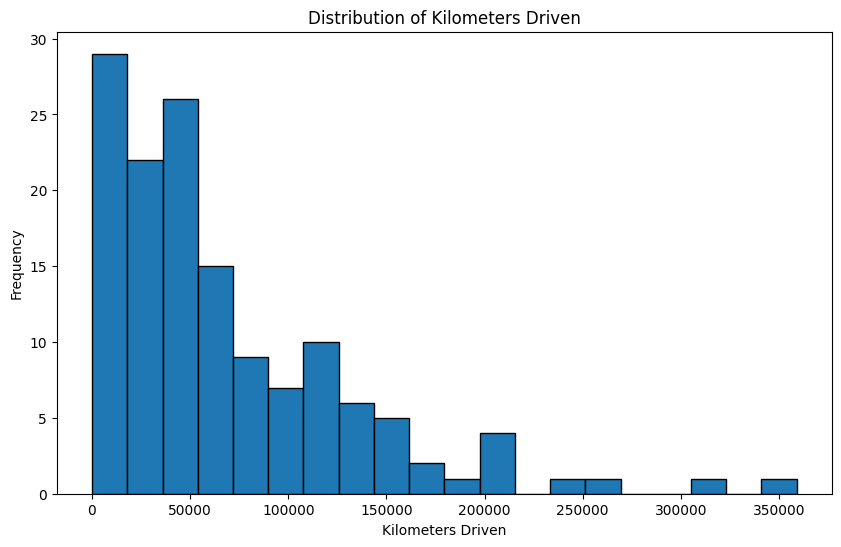

In [4]:

plt.figure(figsize=(10, 6))
plt.hist(df_a["kms"], bins=20, edgecolor='black')
plt.title('Distribution of Kilometers Driven')
plt.xlabel('Kilometers Driven')
plt.ylabel('Frequency')

plt.show()
plt.close()

2. Make a **boxplot** of the number of kms cars have run. Find the documentation online (include "plt" when googeling). What do the elements of this boxplot represent? Orient it horizontally.

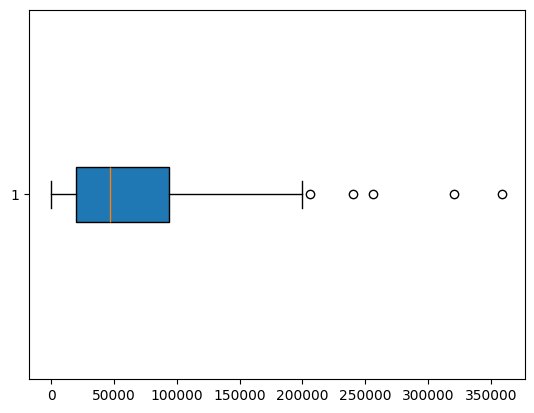

In [5]:

db_boxplot = [df["kms"]]
bp = plt.boxplot(db_boxplot, vert=False, patch_artist=True)
plt.show()



3. Repeat both (histogram and boxplot) below for the price of the sales.

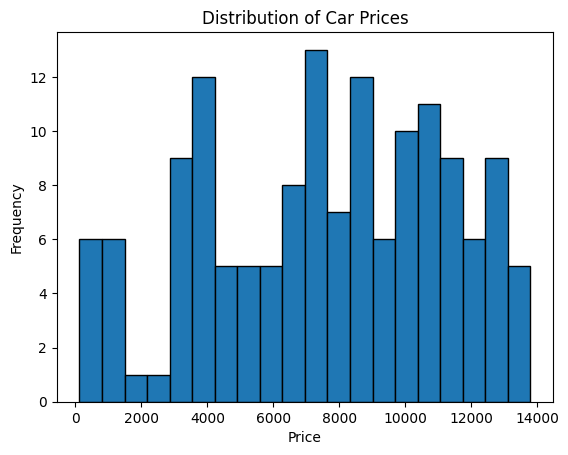

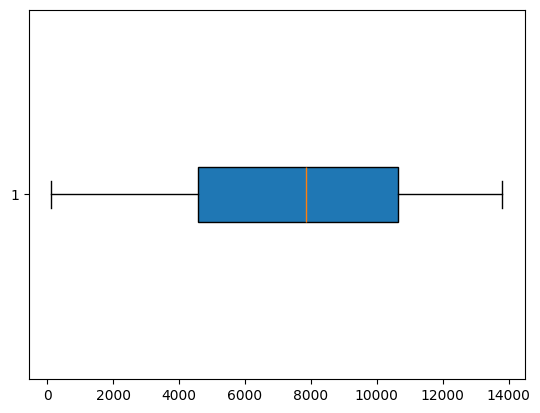

In [6]:
plt.hist(df["price"], bins=20, edgecolor='black')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


db_boxplot = [df["price"]]
bp = plt.boxplot(db_boxplot, vert=False, patch_artist=True)
plt.show()



4. Make a **scatter plot** of the number of kms cars have run (x-axis) vs. the price of the sale (y-axis). Find the documentation online.

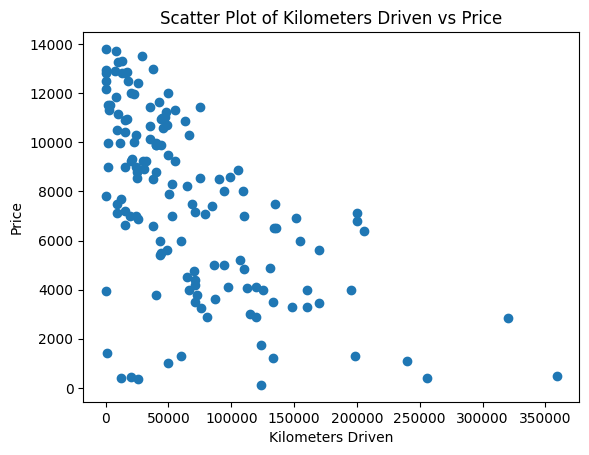

In [7]:


x = df["kms"]
y = df["price"]
plt.scatter(x, y)
plt.xlabel('Kilometers Driven')
plt.ylabel('Price')
plt.title('Scatter Plot of Kilometers Driven vs Price')
plt.show()



5. Do the same for "year vs. price" (select only years after 2005 for a nicer plot). Try to explain potential reasons behind the shape of both scatter plots. Make the scatter plot larger and toy around with the options. Provide a title and axis labels.

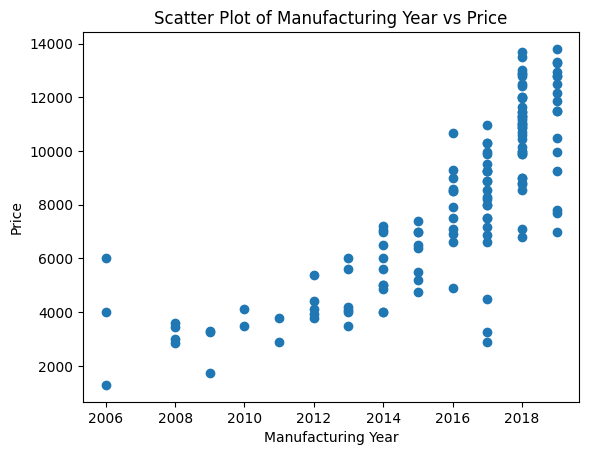

In [8]:


x = df[df["year"] > 2005]["year"]
y = df[df["year"] > 2005]["price"]

plt.scatter(x, y)
plt.xlabel('Manufacturing Year')
plt.ylabel('Price')
plt.title('Scatter Plot of Manufacturing Year vs Price')
plt.show()


## Numerical Measures

We now calculate some numerical values. Look at the documentation of a *pandas dataframe* to see which methods are applicable to it.

1. Mean number of kms driven.
2. Median number of kms. Based on this: are the data skewed?
3. 50%-quantile of number kms. What do you notice?

4. Standard deviation of prices.
5. Variance of prices. What is the relation of this number with 4.?
6. 25%-quantile of both kms and prices. You can select multiple columns with `df[<list_of_columns>]` and apply the method to both at the same time!

7. Get an overview of statistics for kms, year and price, using `df[["kms","year","price"]].describe()`.

8. Calculate the z-score of the price of the car with website id 1026529.

## Finding Outliers for kms (Challenge)

The following functionality is a challenge and implementing it yourself is not part of the expectations for this course. However, you are required to be able to interpret the solution, which will be provided later.

There are two ways to detect outliers from a dataset: using z-scores and using IQR.

The former considers observations "too far removed from the mean" (usually 3 standard deviations removed from the mean, in either direction) as outliers. Write code that creates a new column `z_score_kms` to calculate the z-scores of all car kms, and find outliers this way.

The latter considers observations either (1) less than the first quartile - 1.5*IQR or (2) more than the third quartile + 1.5 IQR, as outliers, with IQR the inter-quartile range, i.e. (75%-quantile - 25%-quantile). Find outliers in the kms using this method. Compare this to the boxplot you made earlier.